In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data.txt')

In [3]:
df.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [56]:
X = df['Size']
y = df['Price']

size = X.size
max_iterations = 500 # epochs
m,c = 1,1 # weight, bias
update_amt = 0.01 # learning rate
df_new = df.copy()

for iteration in range(max_iterations): 
    # df_new['Price'] = df_new['Size'] * m + c
    # df_new.plot(x='Size', y='Price', kind='scatter')
    delta_m, delta_c = 0, 0
    for i in range(size):
        # print(f'X:{X.iloc[i]}, y:{y.iloc[i]}')
        # m = (y.iloc[i] - c) / X.iloc[i]
        # c = y.iloc[i] - (m * X.iloc[i])

        y_new = m * X.iloc[i] + c
        delta_m = (y_new - y.iloc[i]) # loss

        # back_propagation
        if delta_m > 0:
            m -= update_amt * delta_m
            delta_c = 1
        else:
            m += update_amt * delta_m
            delta_c = -1
        c += delta_c * update_amt

C:\Users\samir\AppData\Local\Temp\ipykernel_9564\2175053870.py:19: RuntimeWarning: overflow encountered in scalar multiply
  y_new = m * X.iloc[i] + c


In [44]:
from sklearn.linear_model import LinearRegression

X = np.array(df['Size']).reshape(-1, 1)
y = np.array(df['Price'])

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [47]:
y_new = model.predict(X)
X = X.reshape(-1)

In [48]:
df_new = pd.DataFrame({'Size': X,'Price_predict': y_new})


In [49]:
df_new.head()

,Size,Price_predict
0,2104,354311.697812
1,1600,286510.952801
2,2400,394131.182977
3,1416,261758.299861
4,3000,474846.355609


<Axes: xlabel='Size', ylabel='Price_predict'>

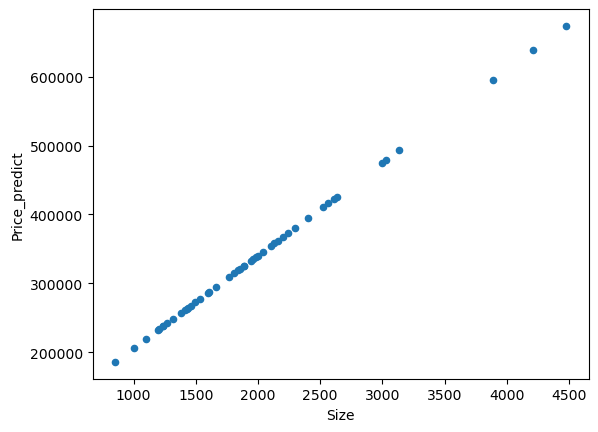

In [52]:
df_new.plot(x='Size', y='Price_predict', kind='scatter')